In [1]:
# python set up
import numpy as np
import matplotlib.pyplot as plt
import math as m
import timeit

In [4]:
def generate_random_sequence(seed, n):
    """
    Inputs:
        seed: the random seed X0
        n: The number of elements in the random sequence  
        
    Outputs:
        The random sequence Xi whose range is 0 to (2^31 - 1)
    """
    rand_sequence = [seed]
    for i in range(1, n + 1):
        rand_sequence.append(7**5 * rand_sequence[i-1] % (2**31 - 1))
        
    return rand_sequence[1:]
# add 0.5 to the random sequence and divide by m, map this functio to the entire rand_sequence
rand_sequence = generate_random_sequence(seed = 7, n = 10000)
U_map = list(map(lambda x: (x + 0.5) / (2**31 - 1), rand_sequence))

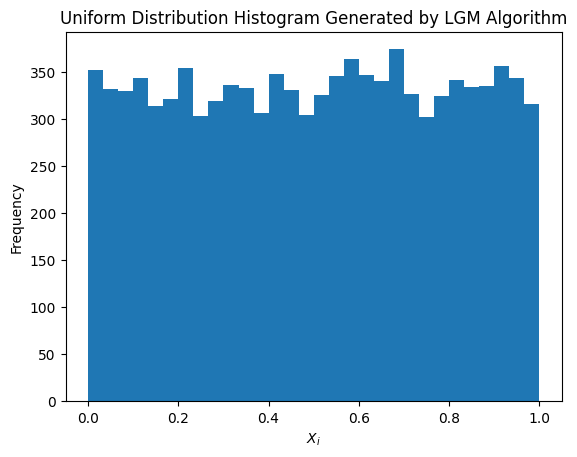

In [5]:
# Use these commands to generate plots
plt.hist(U_map, bins=30)
plt.xlabel('$X_i$')
plt.ylabel('Frequency')
plt.title('Uniform Distribution Histogram Generated by LGM Algorithm')
plt.show()

In [6]:
mean_uniform = sum(U_map)/len(U_map)

In [7]:
print ("The emprical mean of the uniform distribution:" , round(mean_uniform, 5))

The emprical mean of the uniform distribution: 0.50159


In [8]:
var_uniform = sum(list(map(lambda x: (x - mean_uniform)**2, U)))/len(U)
sd_uniform = var_uniform**(0.5)
print ('The empirical standard deviation of the X distributions is :', round(sd_uniform, 5))

The empirical standard deviation of the X distributions is : 0.2891


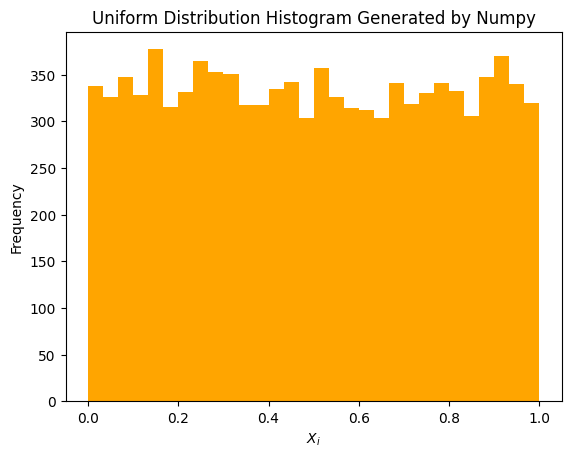

In [9]:
# Use Numpy generators
np.random.seed(7)
U_builtin = np.random.uniform(size=10000)
plt.hist(U_builtin, bins=30, color='orange' )
plt.xlabel('$X_i$')
plt.ylabel('Frequency')
plt.title('Uniform Distribution Histogram Generated by Numpy')
plt.show()

In [10]:
# build cases maps:
def case_mapping(n):
    if n < 0.3:
        n = -1
    elif 0.3 < n <= (0.3 + 0.35):
        n = 0
    elif (0.3 + 0.35) < n  <=  (0.3 + 0.35 + 0.2):
        n = 1
    else: 
        n = 2 
    return n

# map the function to the random number list generated in (a)
dist_x = list(map(case_mapping, U))

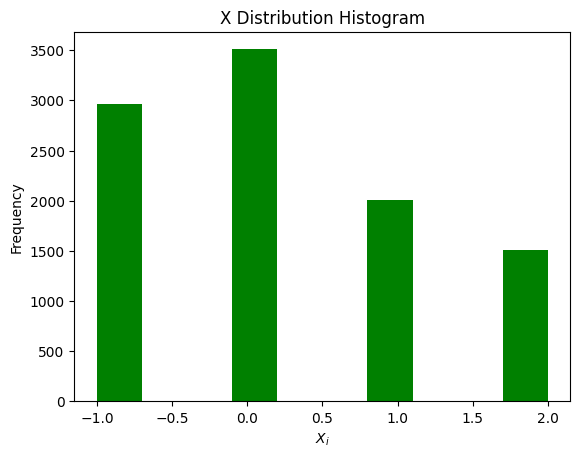

In [11]:
plt.hist(dist_x, color='green')
plt.title('X Distribution Histogram')
plt.xlabel('$X_i$')
plt.ylabel('Frequency')
plt.show()

In [12]:
n = len(dist_x)
mean_x = sum(dist_x)/n
print ('The empirical mean of the X distributions is :', round(mean_x, 5))

The empirical mean of the X distributions is : 0.2067


In [13]:

var_x = sum(list(map(lambda x: (x - mean_x)**2, dist_x)))/n
sd_x = var_x**(0.5)
print ('The empirical standard deviation of the X distributions is :', round(sd_x, 5))

The empirical standard deviation of the X distributions is : 1.02955


In [14]:
# same function mapping as in Question 1
rand_sequence = generate_random_sequence(seed = 7, n = 44000)
U44 = list(map(lambda x: (x + 0.5) /  (2**31 - 1), rand_sequence))
# map the U2 sequence to a conditional lambda function
p = 0.64
bernoulli = list(map(lambda x: 1 if x < p else 0, U44))

In [15]:
# generate split points
split_points= list(range(0, 44000, 44))

# use list comprehension, split the bernoulli list into 1000 sublists and save all the sublists into a giant list 
sublists = [bernoulli[i: i + 44] for i in split_points]
# map the sum function to all sublists
binomial = list(map(sum, sublists))

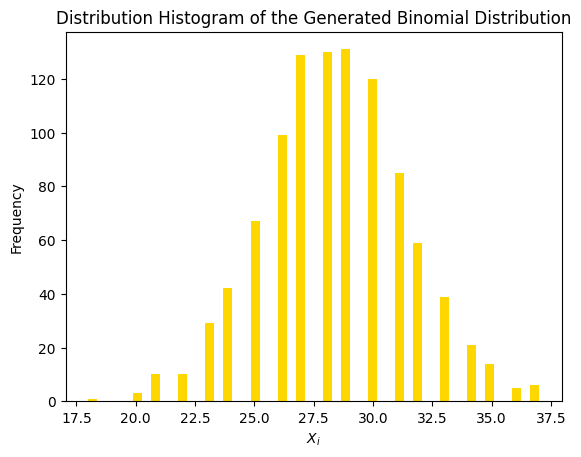

In [16]:
plt.hist(binomial, bins=50, color='gold')
plt.title('Distribution Histogram of the Generated Binomial Distribution')
plt.xlabel('$X_i$')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Find the list of realizations that are greater than 40
greater_40 = list(map(lambda x: 1 if x >= 40 else 0, binomial))
# count the number of elements greater than 40
n_greater_40 = sum(greater_40)
# Find the probability of realizations of 𝑋 ≥ 40
p_greater_40 = n_greater_40 / len(binomial)
print ("The probability that the random variable X that has Binomial (44, 0.64) distribution, is at least 40: P(𝑋 ≥ 40) =" ,
       p_greater_40)

The probability that the random variable X that has Binomial (44, 0.64) distribution, is at least 40: P(𝑋 ≥ 40) = 0.0


In [18]:

# map the function Y = - (1/λ) ln(U) to the U1 sequence 
lmda = 1.5 
expotential = list(map(lambda y: -1/lmda * m.log(y), U))

# find all of the realizations that has Y  ≥ 1, Y ≥ 4
greater_1 = list(map(lambda y: 1 if y >= 1 else 0, expotential))
greater_4 = list(map(lambda y: 1 if y >= 4 else 0, expotential))
# count the number of realizations that has Y  ≥ 1
n_greater_1 = sum(greater_1)
n_greater_4 = sum(greater_4)

# find 𝑃(Y ≥ 1) and 𝑃(Y ≥ 4)
p_greater_1 = n_greater_1 / len(greater_1)
p_greater_4 = n_greater_4 / len(greater_4)

In [19]:
print('𝑃(Y ≥ 1) = ', p_greater_1)
print('𝑃(Y ≥ 4) = ', p_greater_4)

𝑃(Y ≥ 1) =  0.2242
𝑃(Y ≥ 4) =  0.0044


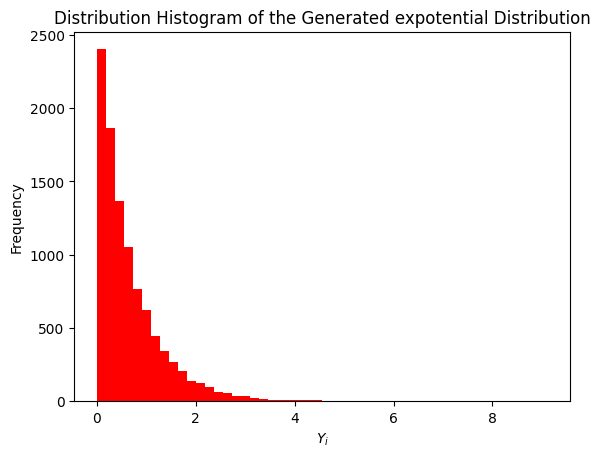

In [21]:
plt.hist(expotential, bins=50, color='red')
plt.title('Distribution Histogram of the Generated expotential Distribution')
plt.xlabel('$Y_i$')
plt.ylabel('Frequency')
plt.show()

In [22]:
mean_exp = sum(expotential) / n
print ("The emprical mean of the simulated expotential distributions:", round(mean_exp, 5))

The emprical mean of the simulated expotential distributions: 0.67136


In [23]:
var_exp = sum(list(map(lambda y: (y - mean_exp)**2, expotential)))/n
sd_exp = var_exp**0.5
print ("The emprical standard deviation of the simulated expotential distributions:", round(sd_exp, 5))

The emprical standard deviation of the simulated expotential distributions: 0.69723


In [24]:
rand1 = generate_random_sequence(n = 5000, seed = 101)
rand2 = generate_random_sequence(n = 5000, seed = 123)
U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand1))
U2 = list(map(lambda x2: (x2 + 0.5) / (2**31 - 1), rand2))

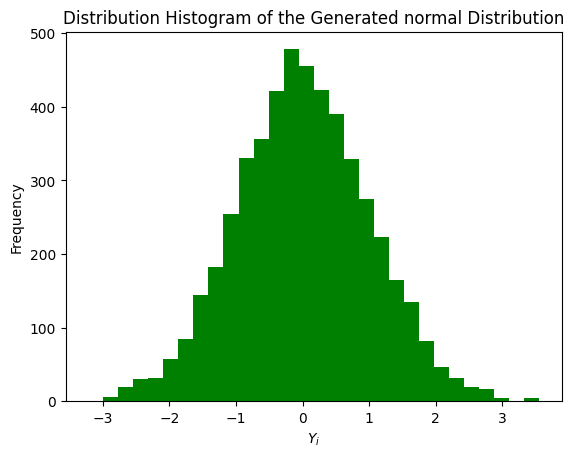

In [26]:

# define Z1 with the uniform random numbers U1 and U2
Z1 = list(map(lambda u1, u2: m.sqrt(-2*m.log(u1)) * m.sin(2*m.pi*u2), U1, U2))
plt.hist(Z1, bins= 30, color = 'green')
plt.title('Distribution Histogram of the Generated normal Distribution')
plt.xlabel('$Y_i$')
plt.ylabel('Frequency')
plt.show()

In [27]:
mean_norm = sum(Z1) / len(Z1)
print ('The emprical mean of the simulated normal distributions with box-muller method:', round(mean_norm, 5))
var_norm = sum(list(map(lambda x: (x - mean_norm)**2, Z1)))/len(Z1)
sd_norm = m.sqrt(var_norm)
print ('The emprical mean of the simulated normal distributions with box-muller method:', round(sd_norm, 5))

The emprical mean of the simulated normal distributions with box-muller method: 0.01063
The emprical mean of the simulated normal distributions with box-muller method: 0.99625


In [28]:
def generate_normal(n, u1, u2):
    """
    Inputs:
        n: number of random numbers we wish to generate
        u1: pre-generated independenent uniform distributions #1
        u2: pre-generated independenent uniform distributions #2
    Outputs:
        Z2: the list contains n normal random numbers
    """
    Z2 = []
    i = 0
    while n > 0:
        
        # find v1, v2
        v1 = 2*u1[i] - 1
        v2 = 2*u2[i] - 1
        W = v1**2 + v2**2
        i += 1
        
        # acceptance-rejection of W
        if W <= 1:
            A = m.sqrt(-2*m.log(W)/W)
            Z2.append(v2 * A)
            n -= 1
        else:
            pass
        
    return Z2

In [29]:
# generate U1, U2
U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), generate_random_sequence(n = 6500, seed = 101)))
U2 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), generate_random_sequence(n = 6500, seed = 123))) 

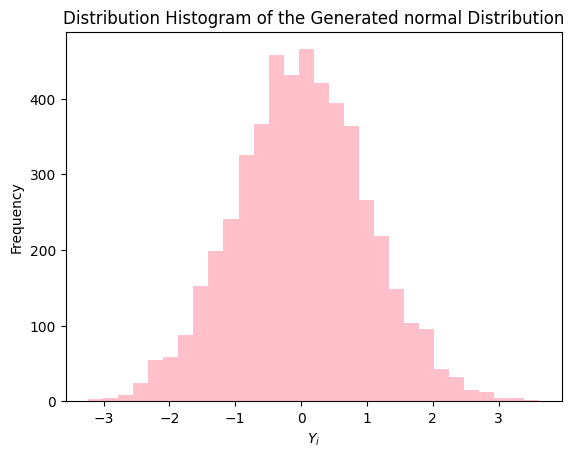

In [31]:
# generate N(0, 1)
Z2 = generate_normal(5000, U1, U2)
plt.hist(Z2, color ='pink', bins = 30)
plt.title('Distribution Histogram of the Generated normal Distribution')
plt.xlabel('$Y_i$')
plt.ylabel('Frequency')
plt.show()

In [32]:
mean_norm = sum(Z2) / len(Z2)
print ('The emprical mean of the simulated normal distributions with Polar-Marsaglia method:', round(mean_norm, 5))
var_norm = sum(list(map(lambda x: (x - mean_norm)**2, Z2)))/len(Z2)
sd_norm = m.sqrt(var_norm)
print ('The emprical mean of the simulated normal distributions with box-muller method:', round(sd_norm, 5))

The emprical mean of the simulated normal distributions with Polar-Marsaglia method: 0.01116
The emprical mean of the simulated normal distributions with box-muller method: 0.99757


In [33]:
start_time = timeit.default_timer()
# box-muller method
rand1 = generate_random_sequence(n = 5000, seed = 101)
rand2 = generate_random_sequence(n = 5000, seed = 123)

U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand1))
U2 = list(map(lambda x2: (x2 + 0.5) / (2**31 - 1), rand2))

Z1 = list(map(lambda u1, u2: m.sqrt(-2*m.log(u1)) * m.sin(2*m.pi*u2), U1, U2))

box_muller_time = timeit.default_timer() - start_time
print ('Time for generating 5000 random normal samples using box-muller method: '
       + str(round(box_muller_time, 5)) + 's')

Time for generating 5000 random normal samples using box-muller method: 0.01398s


In [34]:
start_time = timeit.default_timer()
# box-muller method
rand1 = generate_random_sequence(n = 6500, seed = 101)
rand2 = generate_random_sequence(n = 6500, seed = 123)

U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand1))
U2 = list(map(lambda x2: (x2 + 0.5) / (2**31 - 1), rand2))

Z2 = generate_normal(5000, U1, U2)

polar_marsaglia_time = timeit.default_timer() - start_time
print ('Time for generating 5000 random normal samples using Polar-Marsaglia method: '
       + str(round(polar_marsaglia_time, 5)) + 's')

Time for generating 5000 random normal samples using Polar-Marsaglia method: 0.02011s
